In [1]:
# Import the class to read the file galaxies.hdf5
from GalformRun_basic import * 
import pandas as pd

%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})

In [4]:
#snap 37 ==> 1.1734
#snap 42 ==> 0.755036

def Create_data(volume=0,
                snap=42,
                zsnap=0.755036,
                feedback=True,
                extinction=True,
                input_folder='/data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/',
                output_folder='/data/dega2/dc-manz2/Galform_Out/GOSIA/'):
    
    '''Function to read the output of Galform and write it in the output folder as specified'''
    #create right path
    if feedback: 
        fb = 'gp14'
        fb_save = 'feedback'
    else: 
        fb = 'gp14.nofeedback'
        fb_save= 'nofeedback'
        
    path = input_folder+fb+'/iz'+str(snap)+'/ivol'+str(volume)+'/'
    #path= '../data/uvi'+str(snap)+'_'+fb+'_vol'+str(volume)+'.txt'
    print("READ : ", path)
    #read data from galaxies.hdf5 using the class GalformRun
    G = GalformRun(path)
    if extinction:
        ext=''
        u = np.array(G.get("mag_SDSS-u_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
        g = np.array(G.get("mag_SDSS-g_r_tot_ext",zsnap,filename='tosedfit.hdf5'))    
        r = np.array(G.get("mag_SDSS-r_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
        i = np.array(G.get("mag_SDSS-i_o_tot_ext",zsnap,filename='tosedfit.hdf5'))
        z = np.array(G.get("mag_SDSS-z_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
        B = np.array(G.get("mag_B_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
        V = np.array(G.get("mag_V_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
        J = np.array(G.get("mag_UKIRT-J_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
        H = np.array(G.get("mag_UKIRT-H_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
        K = np.array(G.get("mag_UKIRT-K_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
        NUV = np.array(G.get("mag_GALEX-NUV_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
        FUV = np.array(G.get("mag_GALEX-FUV_r_tot_ext",zsnap,filename='tosedfit.hdf5'))
    else:
        ext='_no_ext'
        u = np.array(G.get("mag_SDSS-u_r_tot",zsnap,filename='tosedfit.hdf5'))
        g = np.array(G.get("mag_SDSS-g_r_tot",zsnap,filename='tosedfit.hdf5'))    
        r = np.array(G.get("mag_SDSS-r_r_tot",zsnap,filename='tosedfit.hdf5'))
        i = np.array(G.get("mag_SDSS-i_o_tot",zsnap,filename='tosedfit.hdf5'))
        z = np.array(G.get("mag_SDSS-z_r_tot",zsnap,filename='tosedfit.hdf5'))
        B = np.array(G.get("mag_B_r_tot",zsnap,filename='tosedfit.hdf5'))
        V = np.array(G.get("mag_V_r_tot",zsnap,filename='tosedfit.hdf5'))
        J = np.array(G.get("mag_UKIRT-J_r_tot",zsnap,filename='tosedfit.hdf5'))
        H = np.array(G.get("mag_UKIRT-H_r_tot",zsnap,filename='tosedfit.hdf5'))
        K = np.array(G.get("mag_UKIRT-K_r_tot",zsnap,filename='tosedfit.hdf5'))
        NUV = np.array(G.get("mag_GALEX-NUV_r_tot",zsnap,filename='tosedfit.hdf5'))
        FUV = np.array(G.get("mag_GALEX-FUV_r_tot",zsnap,filename='tosedfit.hdf5'))
        
    mass = np.array(G.get("mstars_tot",zsnap,filename='tosedfit.hdf5'))
    tp = np.array(G.get("type",zsnap,filename='tosedfit.hdf5'))

    #crete pandas dataframe with data
    df = pd.DataFrame(data={'u':u , 'g':g ,'r':r , 'i':i, 'z':z , 'B':B, 'V':V, 'J':J,'H':H,'K':K,'NUV':NUV,'FUV':FUV,'stellarmass':mass, 'type':tp})
    #save dataframe in a txt file
    output_name= output_folder+'giorgio_galform_'+str(snap)+'_'+fb_save+'_vol'+str(volume)+ext+'.txt' 
    df.to_csv(output_name ,index=None,sep=' ')
    print("WRITE: ", output_name)
    return u,g,r,i,z,B,V,J,H,K,NUV,FUV,mass,tp

In [5]:
u,g,r,i,z,B,V,J,H,K,NUV,FUV,mass,tp = Create_data(volume=0,snap=42,zsnap=0.755036,feedback=True,extinction=False, output_folder='/data/dega2/dc-manz2/Galform_Out/GOSIA/')

READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol0/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol0_no_ext.txt


(array([5.9000e+01, 6.9800e+02, 2.5220e+03, 3.5810e+03, 2.0630e+03,
        2.5680e+03, 5.3100e+03, 5.7200e+03, 9.8960e+03, 1.5928e+04,
        2.5250e+04, 3.4877e+04, 4.2659e+04, 4.6254e+04, 4.5784e+04,
        4.1495e+04, 3.4353e+04, 2.8622e+04, 2.2312e+04, 1.6470e+04,
        1.2540e+04, 1.0020e+04, 8.2990e+03, 6.1200e+03, 4.2410e+03,
        3.2720e+03, 2.9930e+03, 2.1070e+03, 3.4700e+02, 2.9000e+01]),
 array([ 4.3781991 ,  4.61238557,  4.84657205,  5.08075852,  5.314945  ,
         5.54913147,  5.78331795,  6.01750442,  6.2516909 ,  6.48587737,
         6.72006385,  6.95425032,  7.18843679,  7.42262327,  7.65680974,
         7.89099622,  8.12518269,  8.35936917,  8.59355564,  8.82774212,
         9.06192859,  9.29611506,  9.53030154,  9.76448801,  9.99867449,
        10.23286096, 10.46704744, 10.70123391, 10.93542039, 11.16960686,
        11.40379333]),
 <a list of 30 Patch objects>)

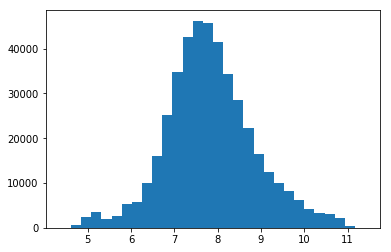

In [6]:
plt.hist(np.log10(mass),bins=30)

# Create data

In [7]:
for v in range(0,64):
    Create_data(volume=v,snap=42,zsnap=0.755036,feedback=True,extinction=False,output_folder='/data/dega2/dc-manz2/Galform_Out/GOSIA/')

READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol0/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol0_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol1/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol1_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol2/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol2_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol3/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol3_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol4/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol4_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol5/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42

WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol48_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol49/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol49_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol50/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol50_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol51/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol51_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol52/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol52_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2.7.0/stable/MillGas/gp14/iz42/ivol53/
WRITE:  /data/dega2/dc-manz2/Galform_Out/GOSIA/giorgio_galform_42_feedback_vol53_no_ext.txt
READ :  /data/dega2/dc-manz2/Galform_Out/v2

# Add subvolumes

In [10]:
def Add_subvolumes(snap=42,feedback=True,N_sub_volumes=1,extinction=True,data_folder='/data/dega2/dc-manz2/Galform_Out/GOSIA/'):
    '''Read all the subvolumes (0 to N_sub_volumes) for the specified snapshot and for the specified AGN feedback scenario'''
    u_tot = []
    g_tot = []
    r_tot = []
    i_tot = []
    z_tot = []
    
    B_tot = []
    V_tot = []
    J_tot = []
    H_tot = []
    K_tot = []
    NUV_tot = []
    FUV_tot = []
    
    
    mass_tot = []
    type_tot = []
    
    if extinction:
        ext=''
    else:
        ext='_no_ext'
    
    for i_vol in range(N_sub_volumes):
        
        if feedback: 
            fb_save = 'feedback'
        else: 
            fb_save= 'nofeedback'
        
        data = pd.read_csv(data_folder+'giorgio_galform_'+str(snap)+'_'+fb_save+'_vol'+str(i_vol)+ext+'.txt',delimiter=' ')
        #print(data['u'][0])

        
        u_tot = np.concatenate((u_tot,data['u']))
        g_tot = np.concatenate((g_tot,data['g']))
        r_tot = np.concatenate((r_tot,data['r']))
        i_tot = np.concatenate((i_tot,data['i']))
        z_tot = np.concatenate((z_tot,data['z']))
        
        B_tot = np.concatenate((B_tot,data['B']))
        V_tot = np.concatenate((V_tot,data['V']))
        J_tot = np.concatenate((J_tot,data['J']))
        H_tot = np.concatenate((H_tot,data['H']))
        K_tot = np.concatenate((K_tot,data['K']))
        NUV_tot = np.concatenate((NUV_tot,data['NUV']))
        FUV_tot = np.concatenate((FUV_tot,data['FUV']))

        mass_tot = np.concatenate((mass_tot,data['stellarmass']))
        type_tot = np.concatenate((type_tot,data['type']))

        #if i_vol ==N_sub_volumes-1:
        #    print(len(u_tot))
        print(len(u_tot))
        
        
    return u_tot,g_tot,r_tot,i_tot,z_tot,B_tot,V_tot,J_tot,H_tot,K_tot,NUV_tot,FUV_tot,mass_tot, type_tot

In [12]:
u37_feed,\
g37_feed,\
r37_feed,\
i37_feed,\
z37_feed,\
B37_feed,\
V37_feed,\
J37_feed,\
H37_feed,\
K37_feed,\
NUV37_feed,\
FUV37_feed,\
mass37_feed,\
type37_feed    = Add_subvolumes(snap=42,feedback=True,extinction=False,N_sub_volumes=64)


436389
882794
1320731
1763215
2213972
2645694
3095974
3539296
3976067
4410287
4857668
5293451
5744769
6200678
6643465
7074851
7512398
7965189
8420468
8866693
9304428
9748871
10183723
10624142
11076359
11506781
11952022
12401309
12857478
13312337
13747361
14191160
14637035
15085100
15518895
15961800
16412419
16868582
17308816
17757436
18197681
18642335
19088687
19525454
19981502
20428568
20878066
21330674
21775865
22216344
22651329
23104743
23546615
23988953
24429321
24892341
25335142
25792497
26234639
26673623
27115473
27560594
27994546
28443462


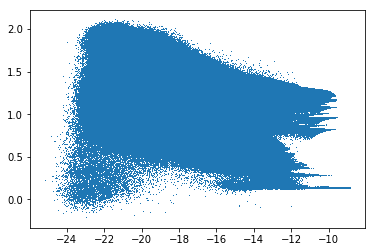

In [13]:
plt.plot(V37_feed,u37_feed-V37_feed,",")
plt.show()

# COSMOLOGY

In [14]:
def integ_trap(func,z1,z2,N=1000):
    z = np.logspace(np.log10(z1),np.log10(z2),N)
    y = func(z)

    A = 0
    for i in range(len(z)-1):
        A += np.abs((z[i+1]-z[i]))*(y[i]+y[i+1])/2
    return A

def E(z,Om_rad=8.4*10**(-5),Om_lambda=0.7,Om_mat=0.3):
    return np.sqrt(Om_rad*(1+z)**4 + Om_mat*(1+z)**3 + Om_lambda)

def over_E(z):
    return E(z)**(-1)

def comoving_distance(z):
    zero = 10**(-20)
    c = 3e5 #km/s
    H0=100. #km/s/Mpc
    return (c*H0**(-1)*integ_trap(over_E,zero,z,10**(3))) #Mpc h^-1

vec_r = np.vectorize(comoving_distance)

def Luminosity_distance(z):
    '''Returns the Luminosity distance in units of Mpc h^-1'''
    return comoving_distance(z)*(1.+z)

def ABSOLUTE_MAGNITUDE_minus5logh(m,z,K_correction=False,ratio_L=1.):
    if K_correction:
        return m -25. -5.*np.log10(Luminosity_distance(z)) -2.5*np.log10(ratio_L*(1.+z))
    else:
        return m -25. -5.*np.log10(Luminosity_distance(z))

vec_ABSOLUTE_MAGNITUDE_minus5logh = np.vectorize(ABSOLUTE_MAGNITUDE_minus5logh)

In [15]:
ABSOLUTE_MAGNITUDE_minus5logh(22.5,z=0.755036)

-20.075056635541458

In [16]:
sel_i_22_5 = np.where(i37_feed<=ABSOLUTE_MAGNITUDE_minus5logh(22.5,z=0.755036))
len(sel_i_22_5[0])

875399

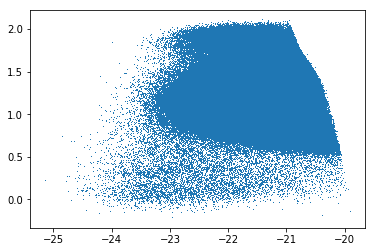

In [17]:
plt.plot(V37_feed[sel_i_22_5],u37_feed[sel_i_22_5]-V37_feed[sel_i_22_5],",")
plt.show()

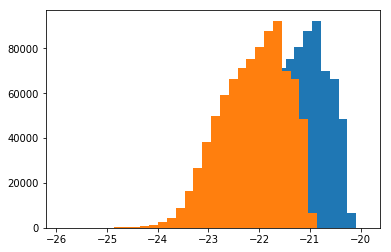

In [18]:
plt.hist(V37_feed[sel_i_22_5],bins=30)
plt.hist(V37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30)
plt.show()

In [19]:
df_225 = pd.DataFrame(data={'u':u37_feed[sel_i_22_5], 
                        'g':g37_feed[sel_i_22_5],
                        'r':r37_feed[sel_i_22_5], 
                        'i':i37_feed[sel_i_22_5], 
                        'z':z37_feed[sel_i_22_5], 
                        'B':B37_feed[sel_i_22_5], 
                        'V':V37_feed[sel_i_22_5], 
                        'J':J37_feed[sel_i_22_5],
                        'H':H37_feed[sel_i_22_5],
                        'K':K37_feed[sel_i_22_5],
                        'NUV':NUV37_feed[sel_i_22_5],
                        'FUV':FUV37_feed[sel_i_22_5],
                        'stellarmass':mass37_feed[sel_i_22_5], 
                        'type':type37_feed[sel_i_22_5] })

In [20]:
df_225.to_csv('/data/dega2/dc-manz2/Galform_Out/GOSIA/snap_42_i225_feed_no_ext.txt' ,index=None,sep=' ')

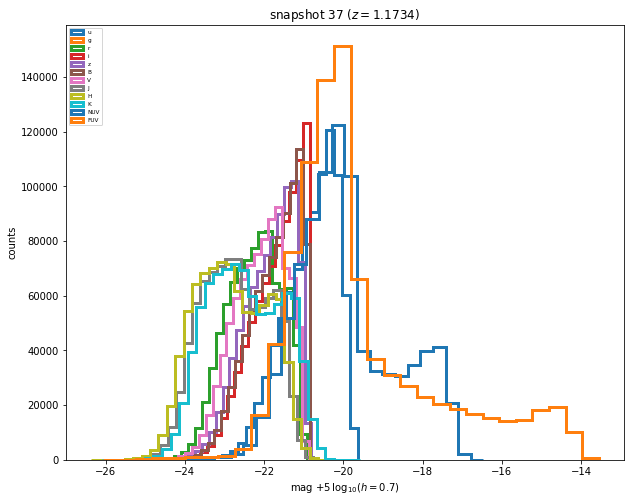

In [21]:
plt.figure(figsize=(10,8))
plt.hist(u37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='u')
plt.hist(g37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='g')
plt.hist(r37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='r')
plt.hist(i37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='i')
plt.hist(g37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='z')
plt.hist(B37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='B')
plt.hist(V37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='V')
plt.hist(J37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='J')
plt.hist(H37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='H')
plt.hist(K37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='K')
plt.hist(NUV37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='NUV')
plt.hist(FUV37_feed[sel_i_22_5]+5*np.log10(0.7),bins=30,histtype='step',lw=3,label='FUV')
plt.legend(fontsize='xx-small')
plt.xlabel(r'mag $+ 5 \, \log_{10}(h = 0.7)$')
plt.ylabel('counts')
plt.title(r'snapshot 37 ($z=1.1734$)')
plt.savefig('./plots/gosia_magnitudes_snap37_feed.png')
plt.show()

(-30.0, 0.0)

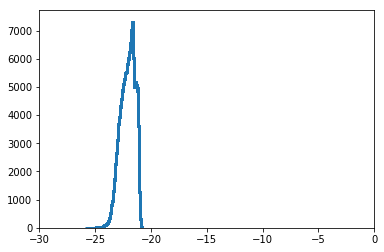

In [22]:
plt.hist(V37_feed[sel_i_22_5]+5*np.log10(0.7),bins=400,histtype='step',lw=3,label='V')
plt.xlim(-30.,0.)